In [26]:
#import necessary libraries and dispKernal 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from dispkernel import dispKernel

In [7]:
#mount the google drive for data access purpose
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
#load neccessary files as numpy arrays
path = "/content/drive/My Drive/Machine Intelligence 3rd Year Intro to MI Data/Assignment2/"
train_data = np.loadtxt(path + "traindata.csv",delimiter=",")
train_label = np.loadtxt(path + "trainlabel.csv",delimiter=",")
valid_data = np.loadtxt(path + "validdata.csv",delimiter=",")
valid_label = np.loadtxt(path + "validlabel.csv",delimiter=",")

In [19]:
#define initial hyperparamters (can be adjusted later on in function calls using keyword parameters)
activation_function = "Linear" 
epochs = 100
learning_rate = 0.1
random_seed = 0

In [10]:
#initialize weights and bias
def generate_weights_and_bias(random_seed):
  np.random.seed(random_seed)
  weights = np.random.rand(9)*2-1
  bias = np.random.rand()*2-1
  return weights,bias

#compute for loss 
def compute_loss(data,label,weights,bias,activation):
  loss = 0
  for j in range(len(data)):
    sum = predict(data[j],weights,bias,activation) - label[j]
    sum_suqare= sum ** 2
    loss += sum_suqare
  return loss / len(data)

#compute for gradients
def compute_gradients(data,label,weights,bias,activation):
  grad_loss_weight = np.zeros(9)
  grad_loss_bias = 0
  for j in range (len(data)):
    Z_j = np.sum(weights*data[j]) + bias
    l_j = label[j]
    del_loss_weight = del_loss_bias = 0

    if (activation == "Linear"):
      del_loss_weight = np.array([2*(Z_j-l_j)*data[j][i] for i in range (len(data[j]))])
      del_loss_bias = 2*(np.sum(weights*data[j])+bias-label[j])
    elif (activation == "ReLU"):
      if (Z_j > 0):
        del_loss_weight = np.array([2*(Z_j-l_j)*data[j][i] for i in range (len(data[j]))])
        del_loss_bias = 2*(np.sum(weights*data[j])+bias-label[j])
      elif (Z_j <= 0):
        del_loss_weight = 0
        del_loss_bias = 0
    elif (activation == "Sigmoid"):
      y = predict(data[j],weights,bias,activation)
      del_loss_y = 2*y-2*l_j
      del_y_z = y*(1-y)
      del_loss_weight = np.array([del_loss_y*del_y_z*data[j][i] for i in range (len(data[j]))])
      del_loss_bias = del_loss_y * del_y_z * 1

    grad_loss_weight += del_loss_weight
    grad_loss_bias += del_loss_bias
  return grad_loss_weight/len(data),grad_loss_bias/len(data)

#compute for accuracy
def compute_accuracy(data,label,weights,bias,activation):
  count_correct = 0
  for j in range (len(data)):
    prediction = predict(data[j],weights,bias,activation)
    if (prediction >= 0.5):
      predicted_label = 1
    else:
      predicted_label = 0
    if (predicted_label == label[j]):
      count_correct += 1
  return count_correct / len(data)

#generate predictions
def predict(data_j,weights,bias,activation):
  z = np.sum(weights * data_j) + bias
  if (activation == "Linear"):
    return z
  elif (activation == "ReLU"):
    if (z > 0):
      return z
    else:
      return 0
  elif (activation == "Sigmoid"):
    return 1.0 / (1 + np.exp(-z))
  return 0
  
'''
weights,bias = generate_weights_and_bias(0)
compute_loss(train_data,train_label,weights,bias)
print(compute_gradients(train_data,train_label,weights,bias,"Sigmoid"))
print(compute_accuracy(train_data,train_label,weights,bias,"Sigmoid"))
'''

'\nweights,bias = generate_weights_and_bias(0)\ncompute_loss(train_data,train_label,weights,bias)\nprint(compute_gradients(train_data,train_label,weights,bias,"Sigmoid"))\nprint(compute_accuracy(train_data,train_label,weights,bias,"Sigmoid"))\n'

In [28]:
#main training loop
def main_train(epochs,random_seed,learning_rate,activation,train_data,train_label,valid_data,valid_label):
  weights,bias = generate_weights_and_bias(random_seed)
  train_acc = []
  train_loss = []
  valid_acc = []
  valid_loss = []

  for i in range (epochs):
    #keep track of both training and validation losses
    training_loss = compute_loss(train_data,train_label,weights,bias,activation)
    validation_loss = compute_loss(valid_data,valid_label,weights,bias,activation)

    #get the gradients and update the weights and bias
    gradient_weights,gradient_bias = compute_gradients(train_data,train_label,weights,bias,activation)
    weights -= gradient_weights * learning_rate
    bias -= gradient_bias * learning_rate

    #compute for training and validation accuracies
    training_accuracy = compute_accuracy(train_data,train_label,weights,bias,activation)
    validation_accuracy = compute_accuracy(valid_data,valid_label,weights,bias,activation)

    #store all the historical accuracies and losses into lists for plotting purpose later on
    train_acc.append(training_accuracy)
    train_loss.append(training_loss)
    valid_acc.append(validation_accuracy)
    valid_loss.append(validation_loss)
    
    #print out intermediate results every 100 epochs
    if ((i+1) % 100 == 0):
      print(f"Epochs {(i+1)} completed")
      print("Training Accuracy: "+str(training_accuracy))
      print("Training Loss: "+str(training_loss))
      print("Validation Accuracy: "+str(validation_accuracy))
      print("Validation Loss: "+str(validation_loss))
      print()
    
  #plot: Training and Validation Losses VS Epochs
  epochs_list = range(epochs)
  plt.figure(1)
  plt.plot(epochs_list,train_loss,label="Training Loss")
  plt.plot(epochs_list,valid_loss,label="Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  #plot: Training and Validation Accuracies VS Epochs
  plt.figure(2)
  plt.plot(epochs_list,train_acc,label="Training Accuracy")
  plt.plot(epochs_list,valid_acc,label="Validation Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  #print final training results
  print(f"Final Training Loss:{training_loss}")
  print(f"Final Training Accuracy:{training_accuracy}")
  print(f"Final Validation Loss:{validation_loss}")
  print(f"Final Validation Accuracy:{validation_accuracy}")
  print(f"Final Weights:{weights}")
  
  dispKernel(weights,3,12)
  return 0


    

Epochs 100 completed
Training Accuracy: 0.785
Training Loss: 0.21965728790937458
Validation Accuracy: 0.7
Validation Loss: 0.28188812587210255

Epochs 200 completed
Training Accuracy: 0.885
Training Loss: 0.11921250097986123
Validation Accuracy: 0.75
Validation Loss: 0.1470403796483757

Epochs 300 completed
Training Accuracy: 0.935
Training Loss: 0.08874662465955638
Validation Accuracy: 0.9
Validation Loss: 0.10147096204569786

Epochs 400 completed
Training Accuracy: 0.94
Training Loss: 0.07525995333181845
Validation Accuracy: 0.95
Validation Loss: 0.08178695929750285

Epochs 500 completed
Training Accuracy: 0.945
Training Loss: 0.06825477731917723
Validation Accuracy: 0.95
Validation Loss: 0.07212995215598872

Epochs 600 completed
Training Accuracy: 0.96
Training Loss: 0.06430948510359479
Validation Accuracy: 0.95
Validation Loss: 0.067028331817053

Epochs 700 completed
Training Accuracy: 0.965
Training Loss: 0.06193433289673545
Validation Accuracy: 0.95
Validation Loss: 0.06419195544

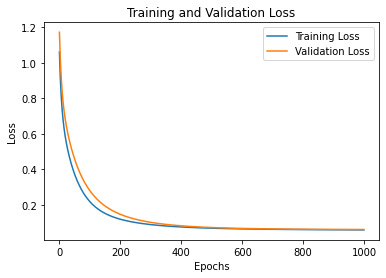

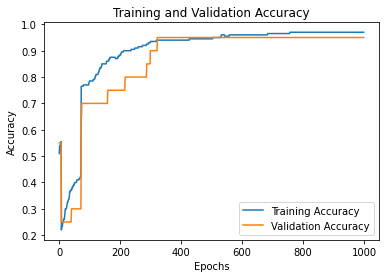

Final Training Loss:0.058613540087024275
Final Training Accuracy:0.97
Final Validation Loss:0.06098069130518198
Final Validation Accuracy:0.95
Final Weights:[ 0.24508492 -0.0980674   0.18967756 -0.17235702  0.16084879 -0.12474511
  0.21475861 -0.15025401  0.21826932]


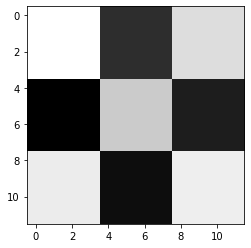

0

In [32]:
main_train(epochs=1000,random_seed=0,learning_rate=0.01,activation='Linear',
                     train_data=train_data,train_label=train_label,
                     valid_data=valid_data,valid_label=valid_label)

Epochs 100 completed
Training Accuracy: 0.81
Training Loss: 0.18712129917118667
Validation Accuracy: 0.7
Validation Loss: 0.24197398875169912

Epochs 200 completed
Training Accuracy: 0.91
Training Loss: 0.07738488790947458
Validation Accuracy: 0.85
Validation Loss: 0.10902920785889889

Epochs 300 completed
Training Accuracy: 0.96
Training Loss: 0.04524674213475378
Validation Accuracy: 0.9
Validation Loss: 0.0644351484845413

Epochs 400 completed
Training Accuracy: 0.97
Training Loss: 0.031144430850853787
Validation Accuracy: 0.95
Validation Loss: 0.04601244427869948

Epochs 500 completed
Training Accuracy: 0.98
Training Loss: 0.023395229916576842
Validation Accuracy: 0.95
Validation Loss: 0.03738562284089377

Epochs 600 completed
Training Accuracy: 0.985
Training Loss: 0.018873246671250163
Validation Accuracy: 0.95
Validation Loss: 0.03211725862746416

Epochs 700 completed
Training Accuracy: 0.99
Training Loss: 0.016003148553959668
Validation Accuracy: 0.95
Validation Loss: 0.028431614

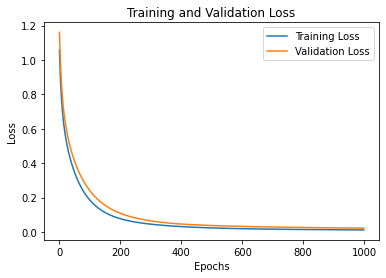

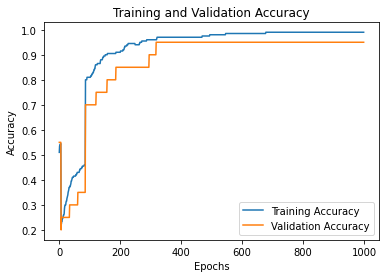

Final Training Loss:0.011760219969062465
Final Training Accuracy:0.99
Final Validation Loss:0.022125009933273893
Final Validation Accuracy:0.95
Final Weights:[ 0.28315163 -0.27192117  0.31316894 -0.44005892  0.12786523 -0.37430935
  0.24825602 -0.2748814   0.61191493]


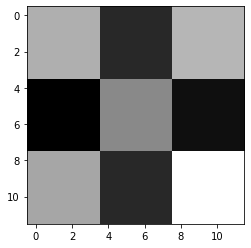

0

In [33]:
main_train(epochs=1000,random_seed=0,learning_rate=0.01,activation='ReLU',
                     train_data=train_data,train_label=train_label,
                     valid_data=valid_data,valid_label=valid_label)

Epochs 100 completed
Training Accuracy: 0.46
Training Loss: 0.34515615351563655
Validation Accuracy: 0.5
Validation Loss: 0.3447609189331008

Epochs 200 completed
Training Accuracy: 0.535
Training Loss: 0.3029782180321056
Validation Accuracy: 0.55
Validation Loss: 0.3089515755031348

Epochs 300 completed
Training Accuracy: 0.605
Training Loss: 0.2672041624273669
Validation Accuracy: 0.6
Validation Loss: 0.27756304756108524

Epochs 400 completed
Training Accuracy: 0.705
Training Loss: 0.23835622250733507
Validation Accuracy: 0.65
Validation Loss: 0.2514976730683368

Epochs 500 completed
Training Accuracy: 0.78
Training Loss: 0.21520743042505497
Validation Accuracy: 0.7
Validation Loss: 0.23014415099567218

Epochs 600 completed
Training Accuracy: 0.84
Training Loss: 0.19622196053213692
Validation Accuracy: 0.75
Validation Loss: 0.21237168666732664

Epochs 700 completed
Training Accuracy: 0.9
Training Loss: 0.18025825020857528
Validation Accuracy: 0.8
Validation Loss: 0.19725251583744705


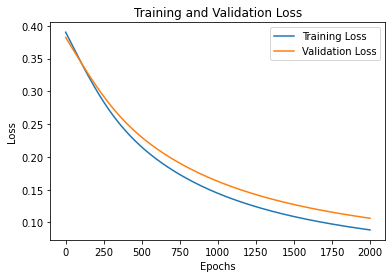

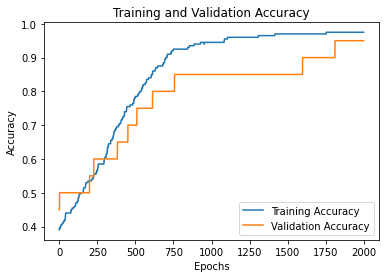

Final Training Loss:0.0886133822024285
Final Training Accuracy:0.975
Final Validation Loss:0.10641604176862811
Final Validation Accuracy:0.95
Final Weights:[ 0.27729774 -0.52713872  0.36972127 -0.77544612  0.07290522 -0.67199246
  0.18755068 -0.30480165  0.83563209]


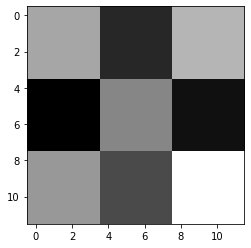

0

In [36]:
main_train(epochs=2000,random_seed=0,learning_rate=0.01,activation='Sigmoid',
                     train_data=train_data,train_label=train_label,
                     valid_data=valid_data,valid_label=valid_label)